<a href="https://colab.research.google.com/github/LoulouiseBipBip/PRA3024/blob/main/Grav_Waves_Challenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwosc==0.5.4'
! pip install pycbc
! pip install -q 'gwpy==3.0.8'

Reason for being yanked: Metadata is broken
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:

%matplotlib inline
from pycbc.catalog import Merger
from pycbc.waveform import get_td_waveform
import pylab
from pycbc.psd import interpolate, inverse_spectrum_truncation
from gwosc.datasets import find_datasets
from gwosc import datasets
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from pycbc import frame
from pycbc.waveform import get_fd_waveform, get_td_waveform
from pycbc.filter import matched_filter
from pycbc.conversions import mass1_from_mchirp_q
from pycbc.filter import resample_to_delta_t, highpass
import numpy
import os

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4096.0 Hz


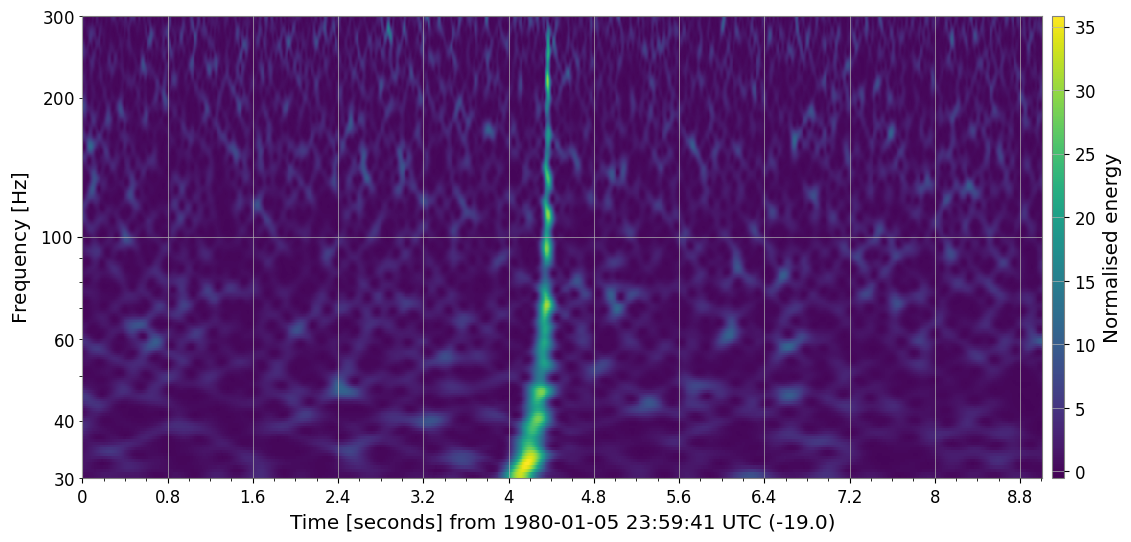

In [4]:
T = TimeSeries.read('/content/drive/MyDrive/challenge2.gwf', 'H1:CHALLENGE2')
hq = T.q_transform(frange=(30, 300), qrange=(30, 50), outseg=(-19,-10))
plot = hq.plot()
plot.colorbar(label="Normalised energy")
ax = plot.gca()
ax.set_yscale("log")
plot.show
print(T.sample_rate)

In [5]:
print(T.duration)
print(T.sample_rate)

128.0 s
4096.0 Hz


In [6]:
apx = 'SEOBNRv4_opt'
sample_rate = 4096 # samples per second
data_length = 128 # seconds

# Generate a long stretch of white noise: the data series and the time series.
data = numpy.random.normal(size=[sample_rate * data_length])
times = numpy.arange(len(data)) / float(sample_rate)
hp, hc = get_td_waveform(approximant=apx,
                         mass1=30,
                         mass2=30,
                         spin1z=0,
                         delta_t=1.0/sample_rate,
                         f_lower=25)
#hp1 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

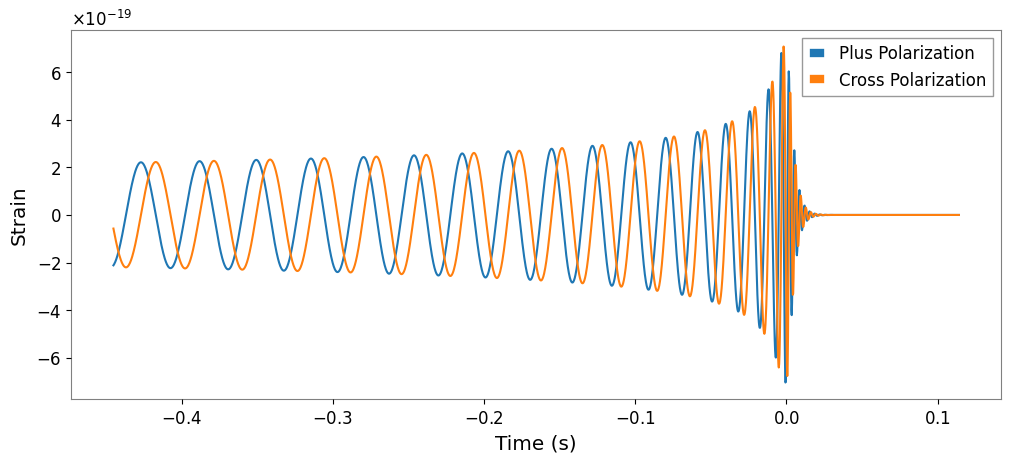

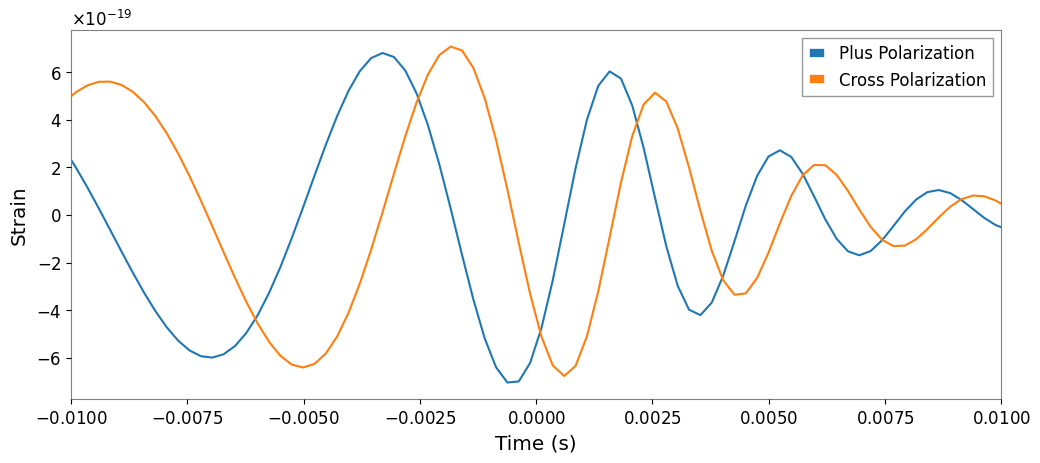

In [7]:
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

# Zoom in near the merger time
pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

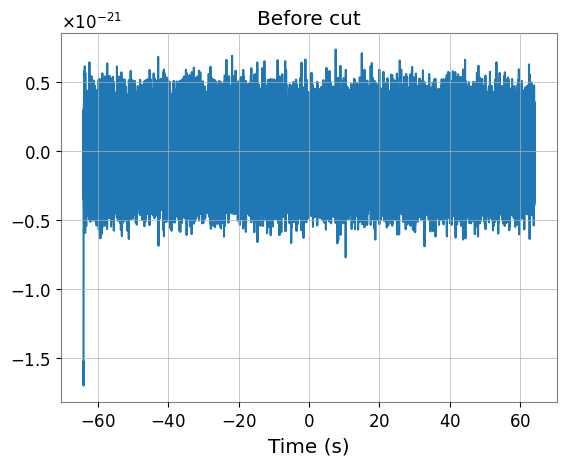

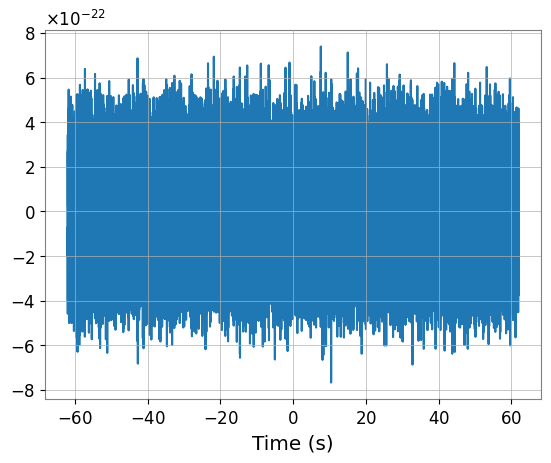

In [10]:
#Converting the data into time series data
T = frame.read_frame('/content/drive/MyDrive/challenge2.gwf', 'H1:CHALLENGE2')
strain = highpass(T, 15)
strain = resample_to_delta_t(strain, 1.0/2048)

pylab.plot(strain.sample_times, strain)
pylab.xlabel('Time (s)')
pylab.title("Before cut")
pylab.show()

# Remove 2 seconds of data from the beginning
conditioned = strain.crop(2, 2)

pylab.plot(conditioned.sample_times, conditioned)
pylab.xlabel('Time (s)')
pylab.show()

(1e-48, 1e-45)

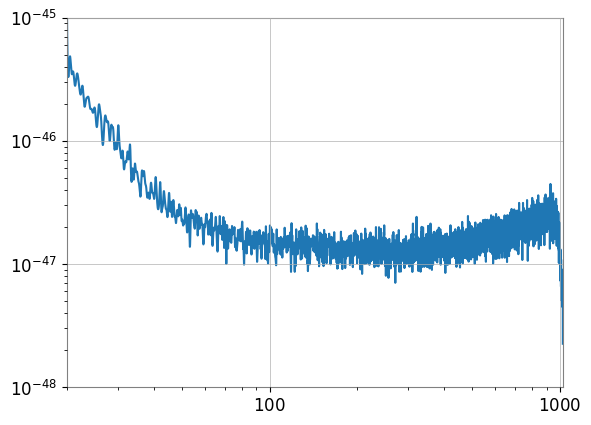

In [11]:
#Computing the PSD
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=20)
pylab.loglog(psd.sample_frequencies,psd)
pylab.xlim(xmin=20, xmax=1024)
pylab.ylim(1e-48, 1e-45)

In [12]:
from pycbc.waveform import get_td_waveform

m = 30 # Solar masses
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=conditioned.delta_t,
                     f_lower=20)

# Resize the vector to match our data
hp.resize(len(conditioned))

Text(0, 0.5, 'Strain')

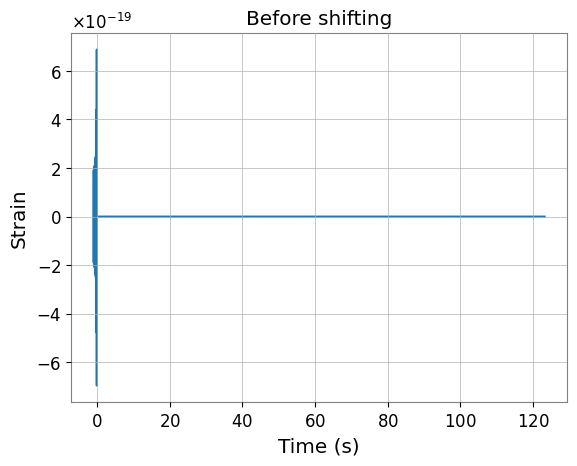

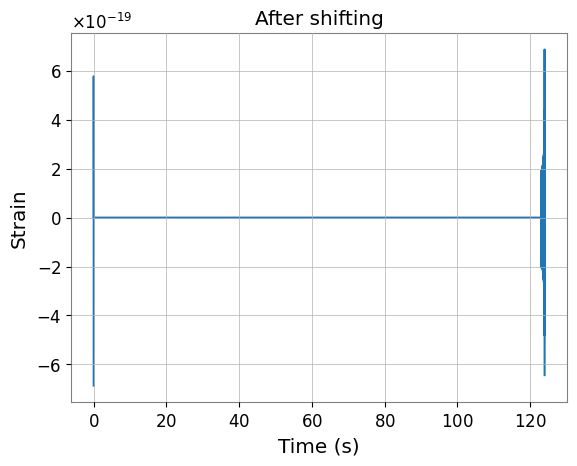

In [13]:
pylab.figure()
pylab.title('Before shifting')
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
  #template
template = hp.cyclic_time_shift(hp.start_time)

pylab.figure()
pylab.title('After shifting')
pylab.plot(template.sample_times, template)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

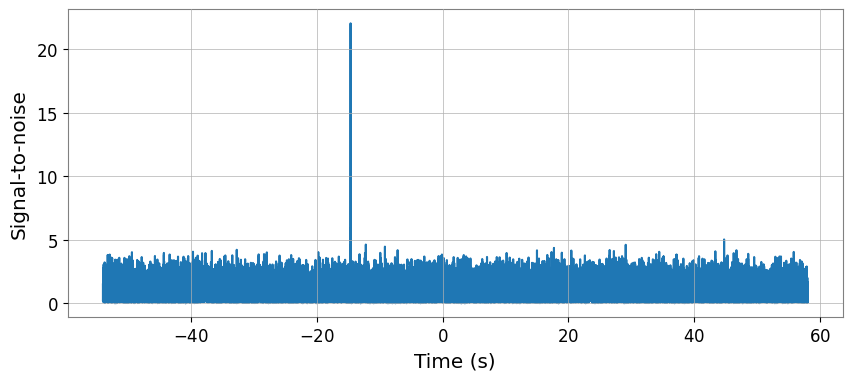

We found a signal at -14.6328125s with SNR 22.04985448430861


In [14]:
from pycbc.filter import matched_filter
import numpy
#Filtering the template
snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)


pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))